In [3]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('raw_data/24h/PM10/2004_PM10_24g.xlsx')
# skip information
data = data.drop(index=[0,1], axis=0)
data = data.reset_index(drop=True)

In [5]:
# example
display(data)

,Kod stacji,DsBialka,DsGlogNorwArch,DsJelw05,DsJgGrottgeraPM,DsJgGrottgeraPMArch,DsLegMick,DsLegRzeczA,DsLegSmok,DsLegZlotor,...,WpOstrowWlkpPM10,WpPila5710111,WpPoznan63117,WpPoznanPM10szpital,WpPoznanSzymanowskiego17,WpWKP008,ZpGryfWiduchowa003,ZpKoszalinWSSE,ZpSwinoujscieWSSE,ZpSzczecinWSSE
0,2004-01-01 00:00:00,NaN,NaN,7.667,NaN,NaN,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.4,NaN,NaN,NaN
1,2004-01-02 00:00:00,NaN,NaN,5.875,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9,NaN,NaN,NaN
2,2004-01-03 00:00:00,NaN,NaN,4.417,NaN,NaN,26,NaN,NaN,NaN,...,NaN,NaN,62,NaN,NaN,NaN,34.5,NaN,NaN,NaN
3,2004-01-04 00:00:00,NaN,NaN,9.875,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,112,NaN,NaN,NaN,30,NaN,NaN,NaN
4,2004-01-05 00:00:00,87.1,NaN,25.333,NaN,NaN,89,NaN,101.2,85.7,...,NaN,112,NaN,NaN,NaN,NaN,49.7,NaN,41,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2004-12-27 00:00:00,21.2,16,5.167,NaN,NaN,NaN,NaN,16.4,20.6,...,NaN,NaN,13,22,11,41,22.7,19,NaN,18
362,2004-12-28 00:00:00,31.8,NaN,7.208,NaN,NaN,NaN,NaN,22.4,30,...,NaN,NaN,0,41,35,83,3.8,21,NaN,25
363,2004-12-29 00:00:00,12.3,27,7,NaN,NaN,NaN,NaN,20,15.8,...,NaN,NaN,0,66,56,32,9.8,49,NaN,27
364,2004-12-30 00:00:00,NaN,NaN,6.167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,35,23,44,9.1,33,NaN,20


In [6]:
# only krakow's data
def krakow_filter(df):
    text = df.columns.to_list()
    regex = re.compile('^MpKrak.*')
    krakow = list(filter(regex.match, text))
    return krakow

In [7]:
# at first, separated df for each param (dict of df)
# the same column name -> adding data
# columns name meaning 

parameters = ['BaP(PM10)', 'PM2.5', 'PM10'] # global

def data_load(skipr, dropr, start_year, end_year):
    df_dict = {p: pd.DataFrame() for p in parameters}
    for p in parameters:
        for year in range(start_year, end_year):
            dir = 'zanieczyszczenia/' + p + '/' + str(year) + '_' + p + '_24g.xlsx' 
            try:
                data = pd.read_excel(dir, skiprows=skipr)
                data = data.drop(index=dropr, axis=0)
                data[data.columns[0]] = pd.to_datetime(data[data.columns[0]])
                data = data.set_index(data.columns[0])
                data.index.name = 'data'
                krakow = krakow_filter(data)
                df_dict[p] = pd.concat([df_dict[p], data[krakow]])
            except FileNotFoundError:
                print(f"Plik {dir} nie został znaleziony.")
    return df_dict


In [8]:
dfs2016 = data_load(0, [0,1], 2004, 2016)
dfs2024 = data_load(1, [0,1,2,3], 2016, 2024)

In [9]:
dfs2024

{'BaP(PM10)':            MpKrakBujaka MpKrakBulwar MpKrakOsPias MpKrakTelime MpKrakWadow  \
 data                                                                         
 2016-01-01          NaN          NaN          NaN          NaN         NaN   
 2016-01-02          NaN          NaN          NaN          NaN         NaN   
 2016-01-03          NaN          NaN          NaN          NaN         NaN   
 2016-01-04       20,968       24,476          NaN          NaN         NaN   
 2016-01-05       20,968       24,476          NaN          NaN         NaN   
 ...                 ...          ...          ...          ...         ...   
 2023-12-27         2.13          1.8          2.4          NaN         1.7   
 2023-12-28         2.13          1.8          2.4          NaN         1.7   
 2023-12-29         2.13          1.8          2.4          NaN         1.7   
 2023-12-30         2.13          1.8          2.4          NaN         1.7   
 2023-12-31         2.13          1.8  

In [10]:
# different names
locations2016 = set()
locations2024 = set()
for p in parameters:
    locations2016.update(dfs2016[p].columns.tolist())
    locations2024.update(dfs2024[p].columns.tolist())
print(sorted(locations2016))
print(sorted(locations2024))

# not all locations - metadata
# download manually remaining locations
# add in the end ( 1 file one station, whole time period)

['MpKrakBujaka', 'MpKrakBulwar', 'MpKrakowWIOSAKra6117', 'MpKrakowWIOSBuja6119', 'MpKrakowWIOSBulw6118', 'MpKrakowWIOSPrad6115', 'MpKrakowWSSEPrad6102']
['MpKrakAlKras', 'MpKrakBujaka', 'MpKrakBulwar', 'MpKrakOsPias', 'MpKrakSwoszo', 'MpKrakTelime', 'MpKrakWadow', 'MpKrakZloRog']


In [11]:
# global dataset
def dataset(parameter):
    # locations set
    locations = set(dfs2016.get(parameter, pd.DataFrame()).columns) | set(dfs2024.get(parameter, pd.DataFrame()).columns)
    # combined df
    # unpacking args
    df = pd.DataFrame(columns = [* locations], index=dfs2016[parameter].index.union(dfs2024[parameter].index))   
    for location in locations:
        # only two options
        if location in dfs2016[parameter].columns:
            df[location] = dfs2016[parameter][location]
        else:
            df[location] = dfs2024[parameter][location]        
    return df
    

In [12]:
dfBaP = dataset('BaP(PM10)')
dfPM10 = dataset('PM10')
dfPM25 = dataset('PM2.5')

In [13]:
print(dfBaP.columns)
print(dfPM10.columns)
print(dfPM25.columns)

Index(['MpKrakAlKras', 'MpKrakowWIOSBulw6118', 'MpKrakZloRog', 'MpKrakOsPias',
       'MpKrakBulwar', 'MpKrakWadow', 'MpKrakSwoszo', 'MpKrakTelime',
       'MpKrakowWIOSPrad6115', 'MpKrakowWIOSBuja6119', 'MpKrakBujaka'],
      dtype='object')
Index(['MpKrakAlKras', 'MpKrakowWIOSBulw6118', 'MpKrakZloRog', 'MpKrakBujaka',
       'MpKrakOsPias', 'MpKrakBulwar', 'MpKrakWadow', 'MpKrakSwoszo',
       'MpKrakTelime', 'MpKrakowWIOSPrad6115', 'MpKrakowWIOSBuja6119',
       'MpKrakowWIOSAKra6117', 'MpKrakowWSSEPrad6102'],
      dtype='object')
Index(['MpKrakowWIOSBulw6118', 'MpKrakBujaka', 'MpKrakowWIOSPrad6115',
       'MpKrakowWIOSBuja6119', 'MpKrakowWIOSAKra6117', 'MpKrakOsPias'],
      dtype='object')


In [14]:
# left data
dietla = pd.read_csv('raw_data/24h/PM10/Dietla.csv', skiprows=0)
dietla.drop(columns='na', inplace=True)
dietla.replace('-', np.nan, inplace=True)
dietla[dietla.columns[0]] = pd.to_datetime(dietla[dietla.columns[0]])
dietla = dietla.set_index(dietla.columns[0])
dietla.index.name = 'data'
dietla

,MpKrakDietla
data,
2016-01-01,212.52
2016-01-02,62.93
2016-01-03,62.28
2016-01-04,NaN
2016-01-05,137.01
...,...
2023-12-27,29.70
2023-12-28,74.82
2023-12-29,31.47


In [15]:
dfPM10['MpKrakDietla'] = dietla
dfPM10

,MpKrakAlKras,MpKrakowWIOSBulw6118,MpKrakZloRog,MpKrakBujaka,MpKrakOsPias,MpKrakBulwar,MpKrakWadow,MpKrakSwoszo,MpKrakTelime,MpKrakowWIOSPrad6115,MpKrakowWIOSBuja6119,MpKrakowWIOSAKra6117,MpKrakowWSSEPrad6102,MpKrakDietla
data,,,,,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.182,NaN,NaN
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.708,6,NaN
2004-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.762,16,NaN
2004-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.583,25,NaN
2004-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.75,54,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,NaN,NaN,22.75,NaN,24.64,NaN,17.18,17.1,NaN,NaN,NaN,NaN,NaN,29.70
2023-12-28,NaN,NaN,41.58,NaN,38.63,NaN,43.52,42.82,NaN,NaN,NaN,NaN,NaN,74.82
2023-12-29,NaN,NaN,20.02,NaN,19.73,NaN,20.26,14.97,NaN,NaN,NaN,NaN,NaN,31.47


In [16]:
# type is object
dfPM10.dtypes
#dfs2016['PM10'].dtypes
# different types inside

MpKrakAlKras            object
MpKrakowWIOSBulw6118    object
MpKrakZloRog            object
MpKrakBujaka            object
MpKrakOsPias            object
MpKrakBulwar            object
MpKrakWadow             object
MpKrakSwoszo            object
MpKrakTelime            object
MpKrakowWIOSPrad6115    object
MpKrakowWIOSBuja6119    object
MpKrakowWIOSAKra6117    object
MpKrakowWSSEPrad6102    object
MpKrakDietla            object
dtype: object

In [17]:
string_values_df = dfBaP.map(lambda x: isinstance(x, str))
dfBaP[string_values_df.any(axis=1)]
# cannot convert coma separated to float

,MpKrakAlKras,MpKrakowWIOSBulw6118,MpKrakZloRog,MpKrakOsPias,MpKrakBulwar,MpKrakWadow,MpKrakSwoszo,MpKrakTelime,MpKrakowWIOSPrad6115,MpKrakowWIOSBuja6119,MpKrakBujaka
data,,,,,,,,,,,
2017-01-02,NaN,NaN,"20,54","11,87",NaN,NaN,NaN,"16,6",NaN,NaN,NaN
2017-01-03,NaN,NaN,"20,54","11,87",NaN,NaN,NaN,"16,6",NaN,NaN,NaN
2017-01-04,NaN,NaN,"20,54","11,87",NaN,NaN,NaN,"16,6",NaN,NaN,NaN
2017-01-05,NaN,NaN,"20,54","11,87",NaN,NaN,NaN,"16,6",NaN,NaN,NaN
2017-01-06,NaN,NaN,"20,54","11,87",NaN,NaN,NaN,"16,6",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,NaN,NaN,"6,07","4,03",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,"6,07","4,03",NaN,"4,83",NaN,NaN,NaN,NaN,NaN
2018-12-29,NaN,NaN,"6,07","4,03",NaN,"4,83",NaN,NaN,NaN,NaN,NaN


In [18]:
def float_conversion(df):
    df.replace(',', '.', regex=True, inplace=True)
    df = df.infer_objects(copy=False)      # no warning
    df = df.apply(pd.to_numeric, errors='coerce')
    return df 

In [20]:
# before combining locations, so there is no warning with fillna
pd.set_option('future.no_silent_downcasting', True) # no warning
dfBaP = float_conversion(dfBaP)
dfPM10 = float_conversion(dfPM10)
dfPM25 = float_conversion(dfPM25)

In [21]:
# combining the same location with different id
def matching_locations(df, station, old_station):
    df[station] = df[station].fillna(df[old_station]) # by data index
    df.drop([old_station], axis=1, inplace=True)
    return

In [22]:
#dfBaP.columns
dfBaP.isnull().sum()

MpKrakAlKras            6233
MpKrakowWIOSBulw6118    5365
MpKrakZloRog            4760
MpKrakOsPias            5854
MpKrakBulwar            6975
MpKrakWadow             4860
MpKrakSwoszo            5480
MpKrakTelime            6801
MpKrakowWIOSPrad6115    7102
MpKrakowWIOSBuja6119    6025
MpKrakBujaka            6962
dtype: int64

In [23]:
matching_locations(dfBaP, 'MpKrakBujaka', 'MpKrakowWIOSBuja6119')
dfBaP.isnull().sum()

MpKrakAlKras            6233
MpKrakowWIOSBulw6118    5365
MpKrakZloRog            4760
MpKrakOsPias            5854
MpKrakBulwar            6975
MpKrakWadow             4860
MpKrakSwoszo            5480
MpKrakTelime            6801
MpKrakowWIOSPrad6115    7102
MpKrakBujaka            5682
dtype: int64

In [24]:
matching_locations(dfBaP, 'MpKrakBulwar', 'MpKrakowWIOSBulw6118')

matching_locations(dfPM10, 'MpKrakBujaka', 'MpKrakowWIOSBuja6119')
matching_locations(dfPM10, 'MpKrakAlKras', 'MpKrakowWIOSAKra6117')
matching_locations(dfPM10, 'MpKrakBulwar', 'MpKrakowWIOSBulw6118')
 
matching_locations(dfPM25, 'MpKrakBujaka', 'MpKrakowWIOSBuja6119')

In [25]:
# stations's name standarization
dfBaP.rename(columns={'MpKrakowWIOSPrad6115': 'MpKrakPrad'}, inplace=True)
dfPM10.rename(columns={'MpKrakowWIOSPrad6115': 'MpKrakPrad'}, inplace=True)
dfPM10.drop(['MpKrakowWSSEPrad6102'], axis=1, inplace=True)
dfPM25.rename(columns={'MpKrakowWIOSPrad6115': 'MpKrakPrad'}, inplace=True)
dfPM25.rename(columns={'MpKrakowWIOSBulw6118': 'MpKrakBulwar'}, inplace=True)
dfPM25.rename(columns={'MpKrakowWIOSAKra6117': 'MpKrakAlKras'}, inplace=True)

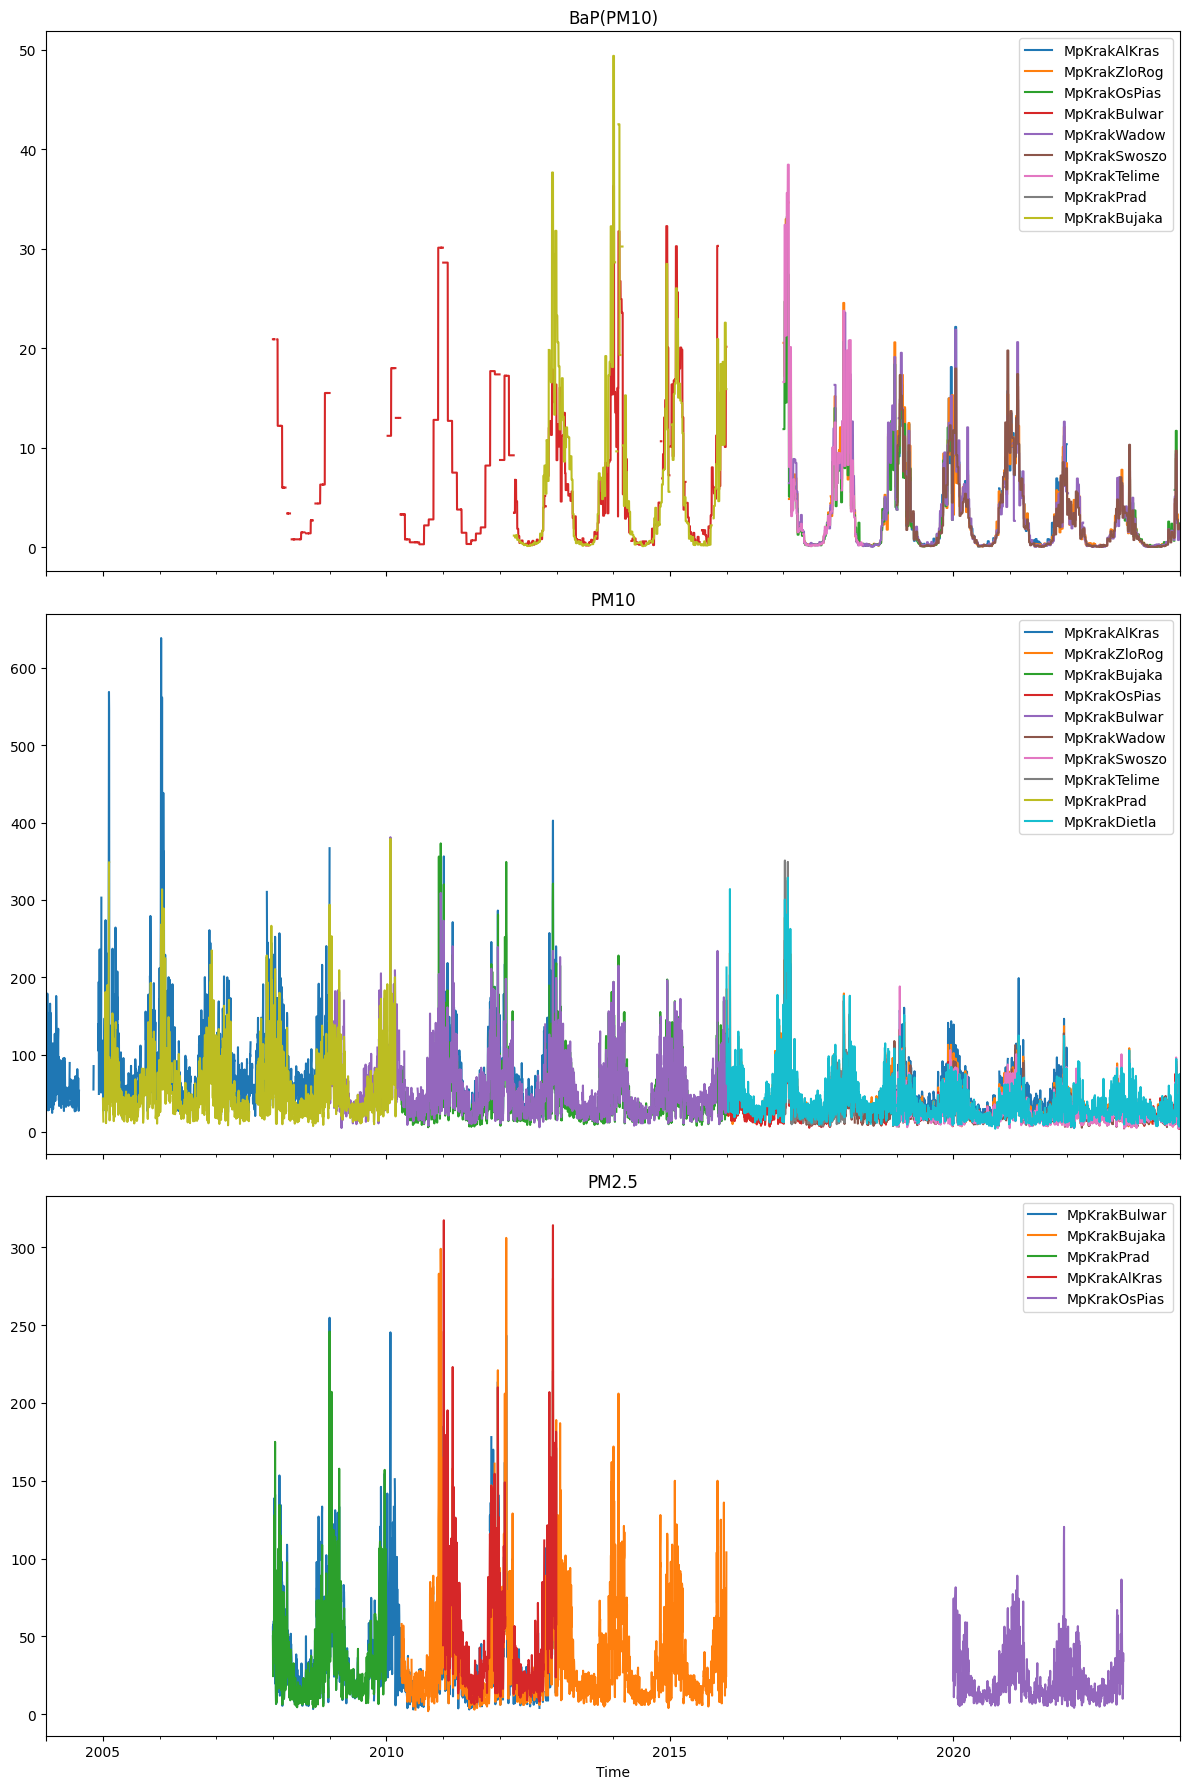

In [26]:
import warnings
warnings.filterwarnings("ignore", message=".*This axis already has a converter set.*")

fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

# # df.plot method works with NA (plt doesn't)
dfBaP.plot(ax=axes[0], title="BaP(PM10)")
dfPM10.plot(ax=axes[1], title="PM10")
dfPM25.plot(ax=axes[2], title="PM2.5")

axes[2].set_xlabel("Time")
plt.tight_layout()
plt.show()

In [27]:
dfPM10.to_csv('data/24h/PM10.csv')
dfPM25.to_csv('data/24h/PM2.5.csv')
dfBaP.to_csv('data/24h/BaP.csv')